In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt

# Characteristics Random Forest



In [13]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_dataframe.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,Number of Analysts,...,Recommendation - Mean (1-5).1,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate
0,POOL.OQ,2022-10-01,4.78,4.58750,4.196,3.843706,1.259813e+10,1.615339e+09,1.406160e+10,10.0,...,2.200,3.747421,189965000.0,360.11111,24.95082,318.21,2.383926,-9.164375,238539.0,3.7
1,POOL.OQ,2022-07-01,7.63,7.51700,1.503,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,9.0,...,2.000,3.092855,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,3.5
2,POOL.OQ,2022-04-01,4.23,3.14867,34.342,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,9.0,...,2.300,2.325202,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,3.6
3,POOL.OQ,2022-01-01,2.63,1.87500,40.267,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,8.0,...,2.300,1.515266,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,4.0
4,POOL.OQ,2021-10-01,4.51,3.84833,17.194,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,8.0,...,2.300,1.527139,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,AVY.N,2014-01-01,0.69,0.68000,1.471,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,8.0,...,2.625,NaN,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,6.6
20116,AVY.N,2013-10-01,0.69,0.63833,8.095,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,7.0,...,2.875,NaN,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,7.2
20117,AVY.N,2013-07-01,0.71,0.70250,1.068,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,8.0,...,2.875,NaN,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,7.3
20118,AVY.N,2013-04-01,0.59,0.57571,2.482,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,7.0,...,3.000,NaN,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,7.6


#### OLS Regression

In [14]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
df_accuracy_new = df_accuracy_new.dropna()


In [15]:
df_accuracy_new

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,Number of Analysts,...,Recommendation - Mean (1-5).1,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate
0,POOL.OQ,2022-10-01,4.78,4.58750,4.196,3.843706,1.259813e+10,1.615339e+09,1.406160e+10,10.0,...,2.20000,3.747421,189965000.0,360.11111,24.95082,318.21,2.383926,-9.164375,238539.0,3.7
1,POOL.OQ,2022-07-01,7.63,7.51700,1.503,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,9.0,...,2.00000,3.092855,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,3.5
2,POOL.OQ,2022-04-01,4.23,3.14867,34.342,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,9.0,...,2.30000,2.325202,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,3.6
3,POOL.OQ,2022-01-01,2.63,1.87500,40.267,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,8.0,...,2.30000,1.515266,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,4.0
4,POOL.OQ,2021-10-01,4.51,3.84833,17.194,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,8.0,...,2.30000,1.527139,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20103,AVY.N,2017-01-01,0.99,0.93238,6.180,2.005620,6.248989e+09,1.550800e+09,7.346389e+09,8.0,...,2.62500,2.431507,62000000.0,83.14286,7.07972,70.22,1.228644,-9.222317,0.0,4.7
20104,AVY.N,2016-10-01,1.01,0.99714,1.290,0.883527,6.912193e+09,1.508700e+09,8.023393e+09,7.0,...,2.66667,1.606498,89100000.0,85.80000,7.67854,77.79,1.320693,4.612928,254525.0,4.9
20105,AVY.N,2016-07-01,1.09,1.01375,7.522,1.095931,6.475959e+09,1.541500e+09,7.421759e+09,8.0,...,2.22222,1.491713,80000000.0,81.00000,3.26599,74.75,1.303846,3.812761,239924.0,4.8
20106,AVY.N,2016-04-01,0.94,0.86113,9.159,1.595578,6.508163e+09,1.485500e+09,7.566763e+09,8.0,...,2.22222,1.829833,89600000.0,76.83333,4.25898,72.11,1.230332,15.735263,257813.0,5.1


In [30]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df_accuracy_new[df_accuracy_new['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]
for_rf = for_rf.iloc[::-1].reset_index(drop=True)


# print the reversed DataFrame
for_rf

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,Number of Analysts,...,Recommendation - Mean (1-5).1,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate
0,AAPL.OQ,2016-01-01,0.8200,0.80683,1.633,2.937422,6.023030e+11,7.587200e+10,6.271920e+11,40.0,...,1.86275,2.304994,1.836100e+10,35.28572,4.76082,26.3150,2.594355,-4.158970,33769300.0,4.8
1,AAPL.OQ,2016-04-01,0.4750,0.49940,-4.886,2.683220,5.858961e+11,5.055700e+10,6.104851e+11,36.0,...,1.78431,1.829833,1.051600e+10,32.92949,5.02365,27.2475,2.677554,4.100984,23926564.0,5.1
2,AAPL.OQ,2016-07-01,0.3550,0.34601,2.599,3.147308,5.115915e+11,4.235800e+10,5.347705e+11,39.0,...,1.85417,1.491713,7.796000e+09,30.59853,4.50478,23.9000,2.409435,-12.208445,36992888.0,4.8
3,AAPL.OQ,2016-10-01,0.4175,0.41402,0.841,2.050626,6.073314e+11,4.685200e+10,6.272084e+11,39.0,...,1.83333,1.606498,9.014000e+09,32.25653,4.52897,28.2625,2.870526,18.889808,42770644.0,4.9
4,AAPL.OQ,2017-01-01,0.8400,0.80345,4.549,2.066090,6.089602e+11,7.835100e+10,6.360572e+11,38.0,...,1.89796,2.431507,1.789100e+10,33.88816,4.04576,28.9550,2.916157,2.981944,0.0,4.7
5,AAPL.OQ,2017-04-01,0.5250,0.50497,3.967,2.140721,7.537179e+11,5.289600e+10,7.851389e+11,38.0,...,1.93878,2.394592,1.102900e+10,37.83238,4.68082,35.9150,3.579782,24.571216,23984120.0,4.4
6,AAPL.OQ,2017-07-01,0.4175,0.39288,6.266,2.110059,7.508972e+11,4.540800e+10,7.824772e+11,39.0,...,1.95745,2.301898,8.717000e+09,40.69346,4.77649,36.0050,3.548621,0.472010,35306112.0,4.3
7,AAPL.OQ,2017-10-01,0.5175,0.46684,10.852,2.549053,7.960649e+11,5.257900e+10,8.375639e+11,33.0,...,2.00000,2.326440,1.071400e+10,44.91792,4.69106,38.5300,3.702993,7.446974,0.0,4.2
8,AAPL.OQ,2018-01-01,0.9725,0.96425,0.856,2.700544,8.688796e+11,8.829300e+10,9.141266e+11,31.0,...,1.84211,2.410840,2.266500e+10,47.45843,4.94014,42.3075,3.971394,10.200090,0.0,4.0
9,AAPL.OQ,2018-04-01,0.6825,0.66821,2.138,2.966133,8.513179e+11,6.113700e+10,8.852179e+11,35.0,...,1.92308,2.744341,1.382200e+10,48.47710,4.37695,41.9450,3.748557,-0.457486,0.0,4.0


In [31]:
corr_matrix = for_rf.corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_24284\669085487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_rf.corr()


<AxesSubplot: >

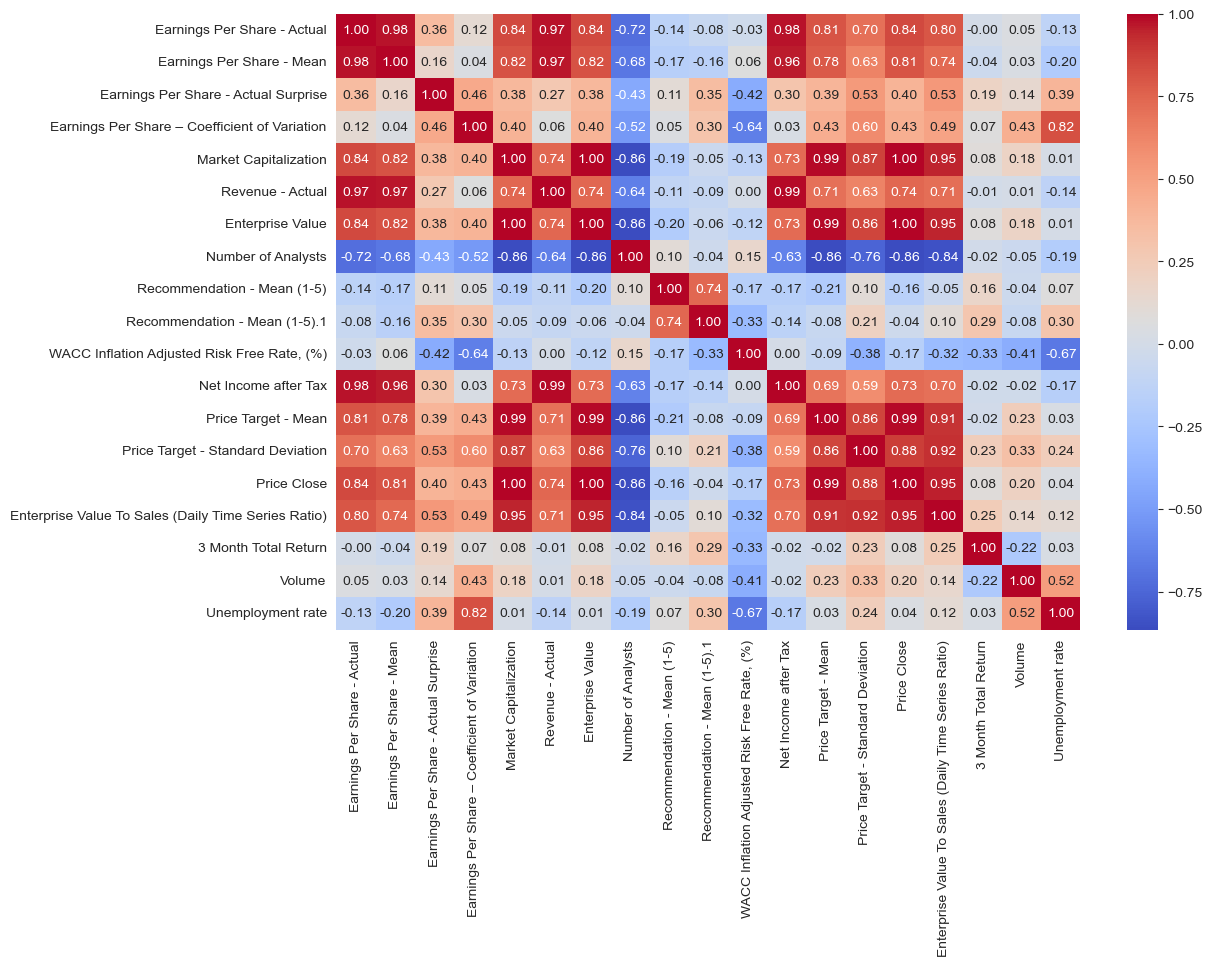

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')